In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# PNAD Contínua - Taxas e Níveis (Tabela 6468)
url = "https://apisidra.ibge.gov.br/values/t/6468/n1/all/v/all/p/all?formato=json"

# Requisição
response = requests.get(url)
data = response.json()

# Converter para DataFrame
df_raw = pd.DataFrame(data)

In [3]:
df_raw.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre (Código),Trimestre
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


In [4]:
# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

EDA - Análise Exploratória de Dados

In [5]:
# Primeira inspeção no Dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NC      331 non-null    object
 1   NN      331 non-null    object
 2   MC      331 non-null    object
 3   MN      331 non-null    object
 4   V       331 non-null    object
 5   D1C     331 non-null    object
 6   D1N     331 non-null    object
 7   D2C     331 non-null    object
 8   D2N     331 non-null    object
 9   D3C     331 non-null    object
 10  D3N     331 non-null    object
dtypes: object(11)
memory usage: 28.6+ KB


In [6]:
df_raw.describe()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
count,331,331,331,331,331,331,331,331,331,331,331
unique,2,2,5,5,91,2,1,7,7,56,56
top,1,Brasil,2,%,Z,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
freq,330,330,110,110,94,330,331,55,55,6,6


In [7]:
# Selecionar apenas colunas importantes
df = df_raw[["D2N", "D3C", "D3N", "V"]].copy()

# Renomear colunas para facilitar
df.columns = ["Variavel", "TrimestreCodigo", "Trimestre", "Valor"]

# Converter Valor para numérico
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")

# Ordenar por código de trimestre
df = df.sort_values("TrimestreCodigo")

df.head()

,Variavel,TrimestreCodigo,Trimestre,Valor
276,Situação da Variação em relação ao mesmo trime...,201201,1º trimestre 2012,NaN
1,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012,8.0
221,Variação em relação ao mesmo trimestre do ano ...,201201,1º trimestre 2012,NaN
56,"Coeficiente de variação - Taxa de desocupação,...",201201,1º trimestre 2012,0.9
111,Variação em relação ao trimestre anterior - Ta...,201201,1º trimestre 2012,NaN


In [8]:
# Remover a linha com index 0
df = df.drop(index=0).reset_index(drop=True)

# Conferir resultado
df.head()

,Variavel,TrimestreCodigo,Trimestre,Valor
0,Situação da Variação em relação ao mesmo trime...,201201,1º trimestre 2012,NaN
1,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012,8.0
2,Variação em relação ao mesmo trimestre do ano ...,201201,1º trimestre 2012,NaN
3,"Coeficiente de variação - Taxa de desocupação,...",201201,1º trimestre 2012,0.9
4,Variação em relação ao trimestre anterior - Ta...,201201,1º trimestre 2012,NaN


In [9]:
# Segunda inspeção no Dataframe, agora já tratado.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variavel         330 non-null    object 
 1   TrimestreCodigo  330 non-null    object 
 2   Trimestre        330 non-null    object 
 3   Valor            215 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.4+ KB


Estatísticas Descritivas

In [10]:
df.describe()

,Valor
count,215.000000
mean,2.751628
std,4.509355
min,-4.900000
25%,-0.300000
50%,1.100000
75%,5.700000
max,14.900000


In [11]:
# Verificar valores nulos
print(df.isnull().sum())

Variavel             0
TrimestreCodigo      0
Trimestre            0
Valor              115
dtype: int64


In [12]:
# Verificar se existem zeros
print((df["Valor"] == 0).sum())

1


In [13]:
# Listar valores únicos da coluna 'Variavel'
df["Variavel"].unique()

array(['Situação da Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade',
       'Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade',
       'Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade',
       'Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade',
       'Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade',
       'Situação da Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade'],
      dtype=object)

In [14]:
# Contar quantos zeros existem em 'Valor' para cada variável
zeros_por_variavel = df.groupby("Variavel")["Valor"].apply(lambda x: (x == 0).sum())

print("Quantidade de zeros por variável:\n")
print(zeros_por_variavel)

Quantidade de zeros por variável:

Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                               0
Situação da Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade    0
Situação da Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 0
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                                         0
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                0
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                           

In [15]:
# Contar valores faltantes (NaN) em 'Valor' para cada variável
faltantes_por_variavel = df.groupby("Variavel")["Valor"].apply(lambda x: x.isna().sum())

print("Quantidade de valores faltantes por variável:\n")
print(faltantes_por_variavel)

Quantidade de valores faltantes por variável:

Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                0
Situação da Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade    55
Situação da Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 55
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                                          0
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 4
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade          

Vou calcular o percentual de dados faltantes em cada variável para entender se vale a pena aplicar alguma metodologia aos dados faltantes.

In [16]:
percentuais_faltantes = df.groupby("Variavel")["Valor"].apply(lambda x: x.isna().mean()*100)
print(percentuais_faltantes)

Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                 0.000000
Situação da Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade    100.000000
Situação da Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 100.000000
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                                           0.000000
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                  7.272727
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 

Conforme observado, as variáveis 'Situação da Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade' e 'Situação da Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade' estão com todos dados sem informações, o que nos leva a crer que muito provavelmente o IBGE nem calcule esses dados. Desta forma, iremos apenas removê-las do nosso dataframe.

In [17]:
# Lista das variáveis que devem ser removidas
variaveis_remover = [
    "Situação da Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade",
    "Situação da Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade"
]

# Remover essas variáveis do DataFrame
df_filtrado = df[~df["Variavel"].isin(variaveis_remover)].copy()

# Conferir resultado
print("Variáveis restantes:\n", df_filtrado["Variavel"].unique())

Variáveis restantes:
 ['Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade'
 'Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade'
 'Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade'
 'Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade']


In [18]:
percentuais_faltantes = df_filtrado.groupby("Variavel")["Valor"].apply(lambda x: x.isna().mean()*100)
print(percentuais_faltantes)

Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                   0.000000
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                             0.000000
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade    7.272727
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 1.818182
Name: Valor, dtype: float64


Com as variáveis não confiáveis já retiradas, observamos a existência de mais dados NaN.
Teoricamente, para séries temporais, faz bastante sentido utilizar um método de preenchimento através de média móvel ou forward fill (valor anterior).
Para este caso em específico, irei utilizar a metodologia de média móvel, com uma janela de 4 períodos, para preenchimento de ambas.
A escolha pela janela de 4 trimestres não é dada ao acaso. Ao observar a nossa distribuição, percebemos que os dados são separados trimestralmente. Desta forma, 4 trimestres equivalem a um ano completo. Portanto, entendo fazer sentido uma vez que buscamos suavizar as variações sazonais e manter alguma coerência temporal imputando valores faltantes com base em um ciclo anual.

In [19]:
df_filtrado["Valor_preenchido"] = (
    df_filtrado.groupby("Variavel")["Valor"]
    .transform(lambda x: x.fillna(x.rolling(4, min_periods=1).mean()))
)

In [20]:
# Percentual de faltantes após imputação
percentuais_faltantes_preenchidos = df_filtrado.groupby("Variavel")["Valor_preenchido"].apply(lambda x: x.isna().mean()*100)

print("Percentual de faltantes após imputação:\n")
print(percentuais_faltantes_preenchidos)

Percentual de faltantes após imputação:

Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                   0.000000
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                             0.000000
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade    7.272727
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 1.818182
Name: Valor_preenchido, dtype: float64


Os percentuais de NaN parecem se manter os mesmos, o que pode indicar que os NaN podem estar aparecendo no início da série, impedindo o preenchimento por média móvel - uma vez que este tem a necessidade de valores anteriores para ser calculado. Também teremos problemas com blocos longos de NaN onde não existem dados suficientes para preencher.

Para resolver esta questão irei complementar a imputação com forward fill (ffill) ou backward fill (bfill), que usam o valor anterior ou posterior para preencher os buracos que a média móvel não conseguiu.

In [21]:
# Primeiro média móvel (janela=4)
df_filtrado["Valor_preenchido"] = (
    df_filtrado.groupby("Variavel")["Valor"]
    .transform(lambda x: x.fillna(x.rolling(4, min_periods=1).mean()))
)

# Depois forward fill para os NaN restantes
df_filtrado["Valor_preenchido"] = (
    df_filtrado.groupby("Variavel")["Valor_preenchido"]
    .transform(lambda x: x.fillna(method="ffill"))
)

# Se ainda restar algum NaN no início, usar backward fill
df_filtrado["Valor_preenchido"] = (
    df_filtrado.groupby("Variavel")["Valor_preenchido"]
    .transform(lambda x: x.fillna(method="bfill"))
)

# Conferir novamente os percentuais
percentuais_faltantes_preenchidos = df_filtrado.groupby("Variavel")["Valor_preenchido"].apply(lambda x: x.isna().mean()*100)
print(percentuais_faltantes_preenchidos)

Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                   0.0
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                             0.0
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade    0.0
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                 0.0
Name: Valor_preenchido, dtype: float64


C:\Users\andre\AppData\Local\Temp\ipykernel_3128\2424863115.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method="ffill"))
C:\Users\andre\AppData\Local\Temp\ipykernel_3128\2424863115.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method="bfill"))


Pronto. Agora temos nosso dataframe 100% tratado.

Distribuição das Variáveis

C:\Users\andre\AppData\Local\Temp\ipykernel_3128\1469580076.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtrado, x="Variavel", y="Valor_preenchido", estimator="mean", ci=None)


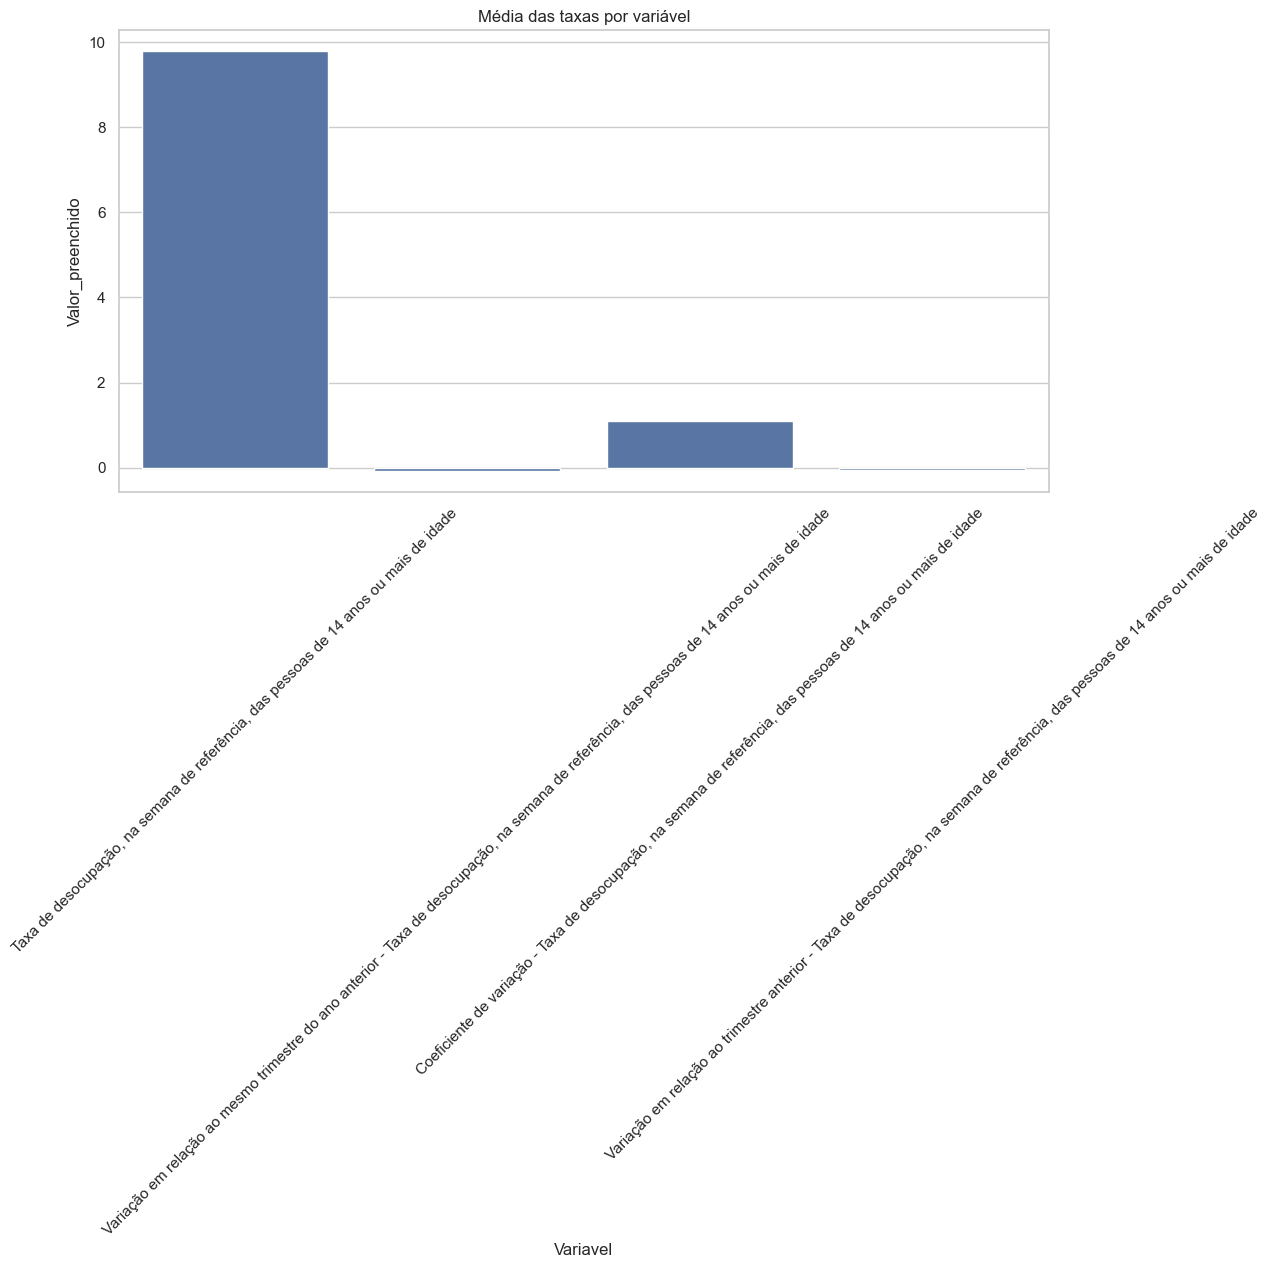

In [22]:
# Distribuição média por variável
sns.barplot(data=df_filtrado, x="Variavel", y="Valor_preenchido", estimator="mean", ci=None)
plt.title("Média das taxas por variável")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Máximos e mínimos por variável
maximos = df_filtrado.groupby("Variavel")["Valor_preenchido"].max()
minimos = df_filtrado.groupby("Variavel")["Valor_preenchido"].min()

print("Máximos:\n", maximos)
print("\nMínimos:\n", minimos)

Máximos:
 Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                    1.5
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                             14.9
Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade     3.1
Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                  2.0
Name: Valor_preenchido, dtype: float64

Mínimos:
 Variavel
Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                   0.8
Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade                                                             5.6
Variação em relaçã

In [24]:
df_filtrado.head()

,Variavel,TrimestreCodigo,Trimestre,Valor,Valor_preenchido
1,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012,8.0,8.0
2,Variação em relação ao mesmo trimestre do ano ...,201201,1º trimestre 2012,NaN,0.1
3,"Coeficiente de variação - Taxa de desocupação,...",201201,1º trimestre 2012,0.9,0.9
4,Variação em relação ao trimestre anterior - Ta...,201201,1º trimestre 2012,NaN,-0.4
6,Variação em relação ao mesmo trimestre do ano ...,201202,2º trimestre 2012,NaN,0.1


In [25]:
df_filtrado_final = df_filtrado.drop('Valor', axis=1)

In [26]:
df_filtrado_final.head()

,Variavel,TrimestreCodigo,Trimestre,Valor_preenchido
1,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012,8.0
2,Variação em relação ao mesmo trimestre do ano ...,201201,1º trimestre 2012,0.1
3,"Coeficiente de variação - Taxa de desocupação,...",201201,1º trimestre 2012,0.9
4,Variação em relação ao trimestre anterior - Ta...,201201,1º trimestre 2012,-0.4
6,Variação em relação ao mesmo trimestre do ano ...,201202,2º trimestre 2012,0.1


Com o dataset já pronto e da forma que eu desejava para construção das análises, vamos passar ao momento da análise descritiva visual, construindo gráficos para o nosso objetivo proposto.

C:\Users\andre\AppData\Local\Temp\ipykernel_3128\391686945.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


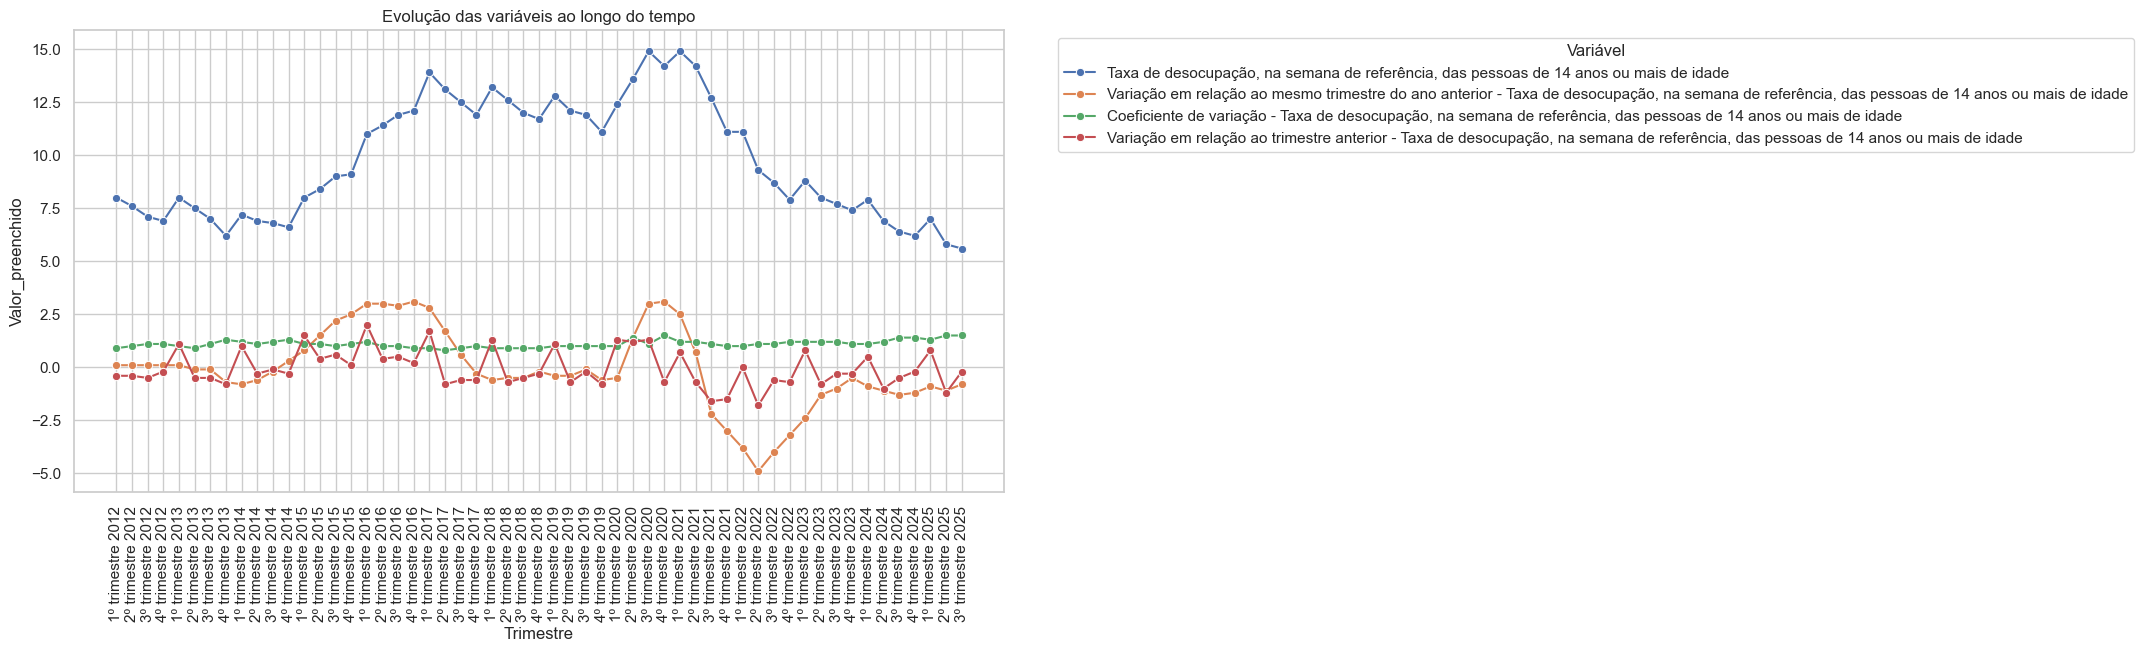

In [27]:
# Gráfico de linha para cada variável
sns.lineplot(
    data=df_filtrado_final, 
    x="Trimestre", 
    y="Valor_preenchido", 
    hue="Variavel", 
    marker="o"
)

plt.title("Evolução das variáveis ao longo do tempo")
plt.xticks(rotation=90)

# Mover legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Variável")

# Ajustar layout para não cortar nada
plt.tight_layout()

plt.show()

Observando o gráfico já temos uma ideia clara dos pontos de máximo e mínimo de cada uma das variáveis, porém nunca é demais verificar mais detalhadamente em qual trimestre esses pontos ocorreram.

In [28]:
# Encontrar o trimestre de máximo e mínimo para cada variável
resultados = {}

for var in df_filtrado_final["Variavel"].unique():
    subset = df_filtrado_final[df_filtrado_final["Variavel"] == var]
    
    # Máximo
    idx_max = subset["Valor_preenchido"].idxmax()
    max_val = subset.loc[idx_max, "Valor_preenchido"]
    max_trim = subset.loc[idx_max, "Trimestre"]
    
    # Mínimo
    idx_min = subset["Valor_preenchido"].idxmin()
    min_val = subset.loc[idx_min, "Valor_preenchido"]
    min_trim = subset.loc[idx_min, "Trimestre"]
    
    resultados[var] = {
        "Máximo": (max_val, max_trim),
        "Mínimo": (min_val, min_trim)
    }

# Mostrar resultados
for var, valores in resultados.items():
    print(f"\nVariável: {var}")
    print(f"  Máximo: {valores['Máximo'][0]} no {valores['Máximo'][1]}")
    print(f"  Mínimo: {valores['Mínimo'][0]} no {valores['Mínimo'][1]}")


Variável: Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade
  Máximo: 14.9 no 3º trimestre 2020
  Mínimo: 5.6 no 3º trimestre 2025

Variável: Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade
  Máximo: 3.1 no 4º trimestre 2016
  Mínimo: -4.9 no 2º trimestre 2022

Variável: Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade
  Máximo: 1.5 no 4º trimestre 2020
  Mínimo: 0.8 no 2º trimestre 2017

Variável: Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade
  Máximo: 2.0 no 1º trimestre 2016
  Mínimo: -1.8 no 2º trimestre 2022


In [29]:
# Filtrar apenas a variável Taxa de Desocupação
taxa_desemprego = df_filtrado_final[
    df_filtrado_final["Variavel"] == "Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade"
]

# Exibir valores em lista vertical por trimestre
for _, row in taxa_desemprego.iterrows():
    print(f"{row['Trimestre']}: {row['Valor_preenchido']}")

1º trimestre 2012: 8.0
2º trimestre 2012: 7.6
3º trimestre 2012: 7.1
4º trimestre 2012: 6.9
1º trimestre 2013: 8.0
2º trimestre 2013: 7.5
3º trimestre 2013: 7.0
4º trimestre 2013: 6.2
1º trimestre 2014: 7.2
2º trimestre 2014: 6.9
3º trimestre 2014: 6.8
4º trimestre 2014: 6.6
1º trimestre 2015: 8.0
2º trimestre 2015: 8.4
3º trimestre 2015: 9.0
4º trimestre 2015: 9.1
1º trimestre 2016: 11.0
2º trimestre 2016: 11.4
3º trimestre 2016: 11.9
4º trimestre 2016: 12.1
1º trimestre 2017: 13.9
2º trimestre 2017: 13.1
3º trimestre 2017: 12.5
4º trimestre 2017: 11.9
1º trimestre 2018: 13.2
2º trimestre 2018: 12.6
3º trimestre 2018: 12.0
4º trimestre 2018: 11.7
1º trimestre 2019: 12.8
2º trimestre 2019: 12.1
3º trimestre 2019: 11.9
4º trimestre 2019: 11.1
1º trimestre 2020: 12.4
2º trimestre 2020: 13.6
3º trimestre 2020: 14.9
4º trimestre 2020: 14.2
1º trimestre 2021: 14.9
2º trimestre 2021: 14.2
3º trimestre 2021: 12.7
4º trimestre 2021: 11.1
1º trimestre 2022: 11.1
2º trimestre 2022: 9.3
3º trimes

A série histórica mostra que, após atingir um mínimo relativo no 4º trimestre de 2019, com a taxa de desocupação em 11,1%, o mercado de trabalho brasileiro sofreu uma forte deterioração. No 3º trimestre de 2020, em plena fase de isolamento social devido à pandemia de COVID-19, a taxa alcançou 14,9%, o maior valor observado em toda a série (patamar que se repetiu no 1º trimestre de 2021). Esse movimento reflete diretamente os impactos da crise sanitária sobre a atividade econômica e o emprego.

A recuperação foi gradual: apenas no 4º trimestre de 2021 o país conseguiu retornar ao nível pré-pandêmico de 11,1%, o mesmo observado no fim de 2019. Considerando o 1º trimestre de 2020 como marco inicial da pandemia no Brasil, pode-se afirmar que foram necessários sete trimestres para que o mercado de trabalho voltasse ao patamar anterior à crise.

A partir de 2022, observa-se uma trajetória sistemática de queda da taxa de desocupação, sinalizando retomada da atividade econômica e maior absorção de mão de obra. Essa tendência culmina em mínimos históricos registrados em três momentos recentes: 4º trimestre de 2024, 2º trimestre de 2025 e 3º trimestre de 2025. Esses resultados sugerem não apenas recuperação, mas também uma possível mudança estrutural no mercado de trabalho, com taxas de desemprego inferiores às observadas antes da pandemia.

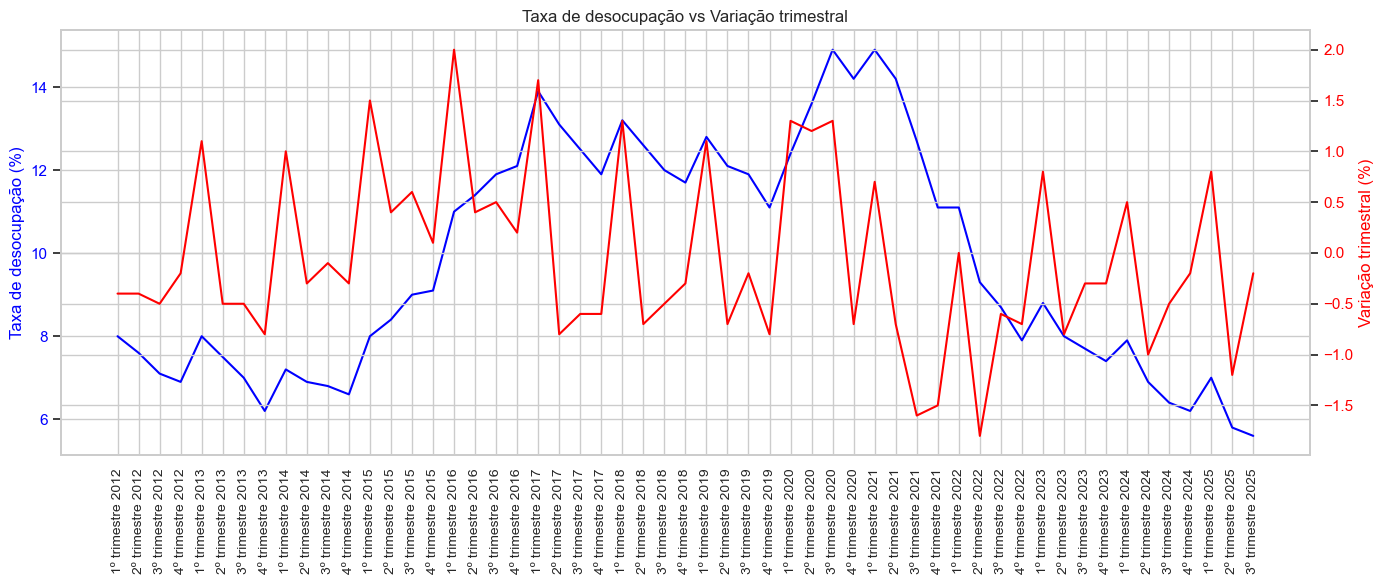

In [30]:
# Pivotar dados usando TrimestreCodigo como índice (numérico e ordenável)
pivot = df_filtrado.pivot(index="TrimestreCodigo", columns="Variavel", values="Valor_preenchido")

fig, ax1 = plt.subplots(figsize=(14,6))

# Taxa de desocupação
ax1.plot(
    pivot.index, 
    pivot["Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade"], 
    color="blue", 
    label="Taxa de desocupação"
)
ax1.set_ylabel("Taxa de desocupação (%)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Eixo secundário para variação trimestral
ax2 = ax1.twinx()
ax2.plot(
    pivot.index, 
    pivot["Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade"], 
    color="red", 
    label="Variação trimestral"
)
ax2.set_ylabel("Variação trimestral (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Substituir os rótulos numéricos por texto (Trimestre)
trimestres_labels = df_filtrado.drop_duplicates("TrimestreCodigo").set_index("TrimestreCodigo")["Trimestre"]
ax1.set_xticks(pivot.index)
ax1.set_xticklabels(trimestres_labels.loc[pivot.index], rotation=90, fontsize=10)

plt.title("Taxa de desocupação vs Variação trimestral")
fig.tight_layout()
plt.show()

No gráfico acima conseguimos observar a dinâmica da mudança. Muitas vezes a variação trimestral muda de sinal antes da taxa mostrar uma tendência clara.
Além disto, conseguimos mostrar a intensidade da crise ou recuperação através deste gráfico, uma vez que a variação vai nos indicar não o patamar, como a taxa de desocupação e sim a velocidade das mudanças.

No 3º trimestre de 2020, além da taxa de desocupação atingir 14,9%, a variação trimestral foi fortemente positiva, indicando que o desemprego não apenas estava alto, mas crescendo rapidamente. Já no 4º trimestre de 2021, a taxa voltou ao patamar pré-pandêmico e a variação se estabilizou, sinalizando o fim da fase aguda da crise.

Ainda, conseguimos observar que, apesar de as taxas históricas de desemprego terem batido recorde durante o período pandêmico, a deterioração do mercado de trabalho parece ter sido mais intensa durante o 1º trimestre de 2015 e 1º trimestre de 2017, onde as taxas de variação trimestral bateram recordes históricos.

Irei fazer uma matriz de corralação para observar a correlação entre variáveis, mas antes irei realizar outro tratamento no dataset, pois observei que os nomes das variáveis estão prejudicando a visualização do heatmap. Para isto, irei renomear as variáveis do dataset.

In [31]:
# Dicionário de mapeamento dos nomes longos para curtos
mapa_variaveis = {
    "Coeficiente de variação - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade": "Coeficiente de variação",
    "Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade": "Taxa de desocupação",
    "Variação em relação ao mesmo trimestre do ano anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade": "Variação em relação ao mesmo trimestre do ano anterior",
    "Variação em relação ao trimestre anterior - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade": "Variação em relação ao trimestre anterior"
}

# Criar novo dataframe com nomes encurtados
df_curto = df_filtrado_final.copy()
df_curto["Variavel"] = df_curto["Variavel"].replace(mapa_variaveis)

# Conferir resultado
print(df_curto["Variavel"].unique())

['Taxa de desocupação'
 'Variação em relação ao mesmo trimestre do ano anterior'
 'Coeficiente de variação' 'Variação em relação ao trimestre anterior']


In [32]:
# Pivotar dados usando TrimestreCodigo como índice (numérico e ordenável)
pivot = df_curto.pivot(index="TrimestreCodigo", columns="Variavel", values="Valor_preenchido")

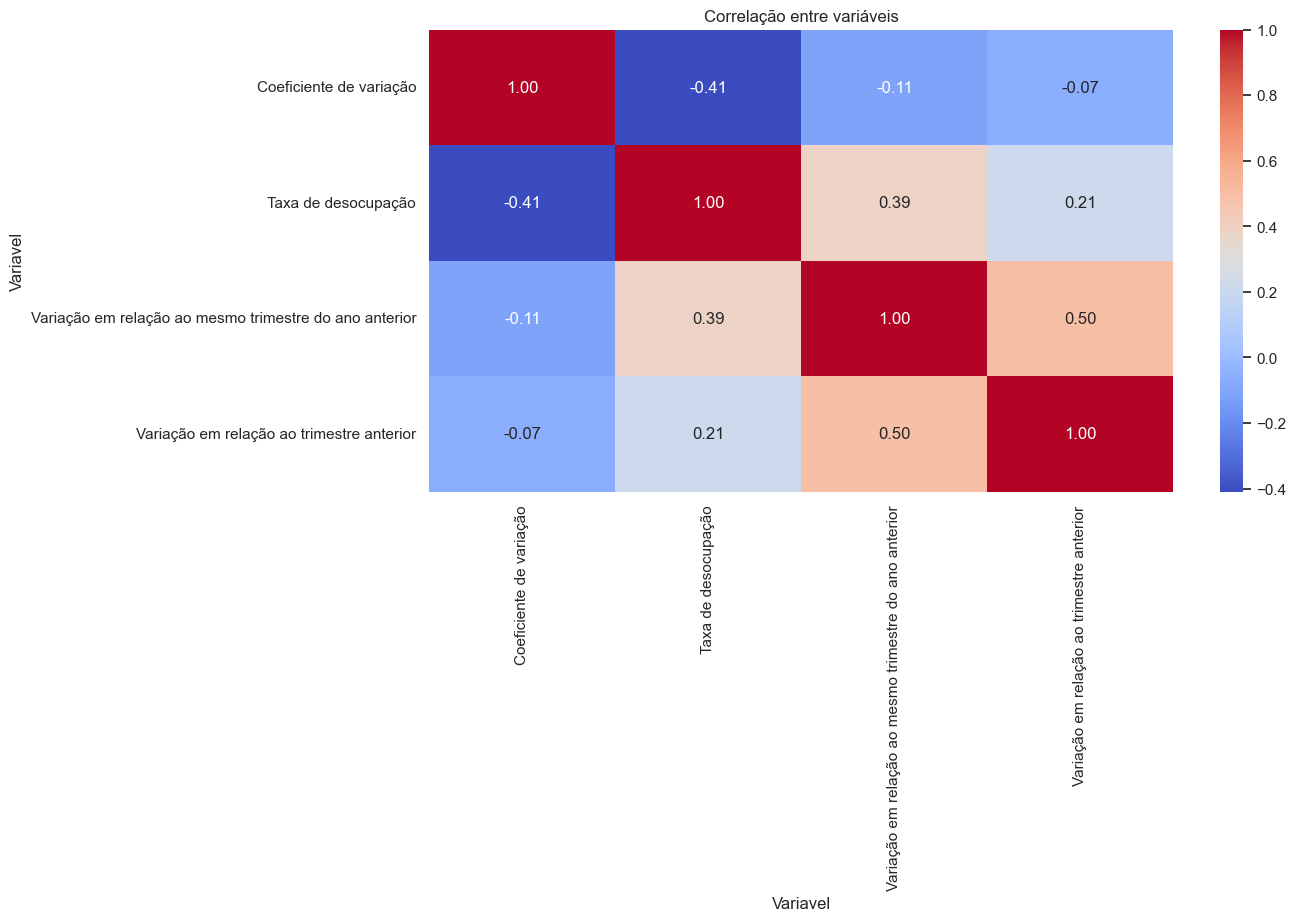

In [33]:
# Matriz de correlação
corr_matrix = pivot.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()

Ao focarmos exclusivamente na **taxa de desocupação**, a matriz de correlação revela diferentes padrões de associação com os demais indicadores:
**- Taxa de desocupação vs. variação trimestral**
    - A relação é de correlação positiva moderada, confirmando o comportamento já observado: quando a taxa aumenta, a variação trimestral tende a ser positiva, refletindo aceleração do desemprego; quando a taxa recua, a variação trimestral assume valores negativos, sinalizando início de recuperação.
    - Esse resultado reforça o papel da variação trimestral como um indicador de curto prazo, capaz de antecipar movimentos da taxa.
    
**- Taxa de desocupação vs. variação anual (mesmo trimestre do ano anterior)**
    - Aqui a correlação é mais elevada, pois ambas as métricas captam a tendência estrutural de longo prazo.
    - Em períodos de trajetória ascendente da taxa, a variação anual também se mostra positiva, consolidando a leitura de que o aumento não é apenas pontual, mas parte de um movimento mais persistente.
    - Esse indicador funciona como um confirmatório de tendência, útil para distinguir oscilações conjunturais de mudanças mais duradouras.
    
**- Taxa de desocupação vs. coeficiente de variação**
    - A correlação é negativa, o que já era esperado. O coeficiente de variação não mede comportamento econômico, mas sim a precisão estatística das estimativas.
    - Em momentos de maior instabilidade, a precisão tende a se reduzir, elevando o coeficiente, sem necessariamente acompanhar a direção da taxa de desocupação.
    - Esse resultado destaca a importância de interpretar o coeficiente como um indicador metodológico, voltado à qualidade da medida, e não como variável explicativa da dinâmica do mercado de trabalho.

**Principais *insights***
    - A variação trimestral atua como indicador antecedente, sinalizando mudanças iminentes na taxa de desocupação.
    - A variação anual reforça a leitura de tendência estrutural, funcionando como validação da direção do movimento.
    - O coeficiente de variação deve ser interpretado como medida de confiabilidade estatística, não como variável econômica.
    - A análise conjunta permite identificar pontos de inflexão e diferenciar entre oscilações de curto prazo e tendências consolidadas, enriquecendo a interpretação da série histórica.

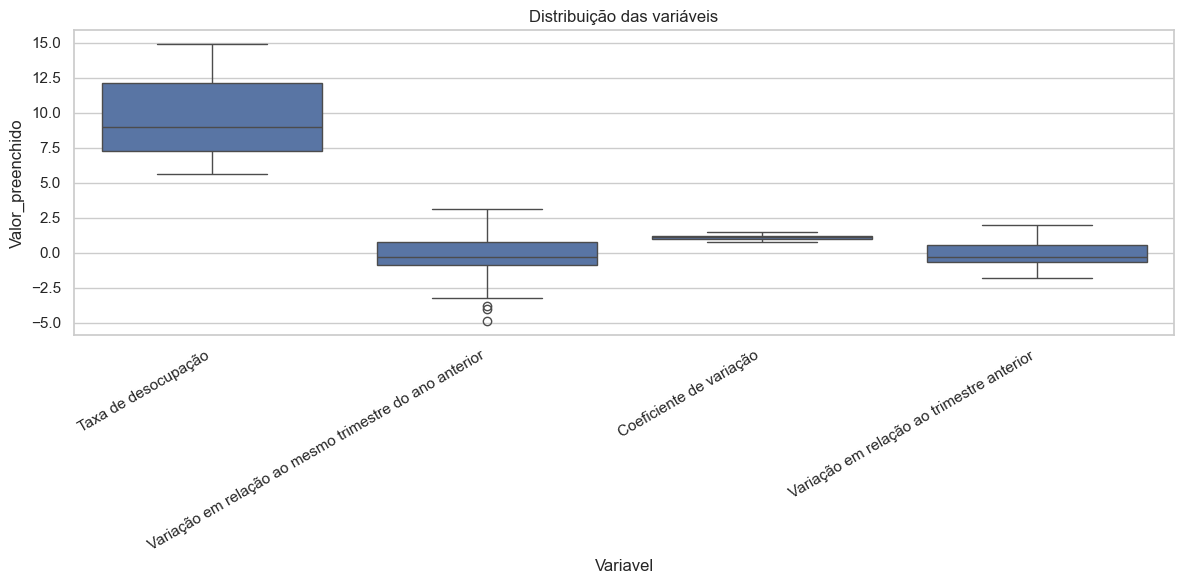

In [34]:
sns.boxplot(data=df_curto, x="Variavel", y="Valor_preenchido")
plt.title("Distribuição das variáveis")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

# Agrupar por variável e calcular estatísticas
estatisticas = df_curto.groupby("Variavel")["Valor_preenchido"].agg(
    media="mean",
    mediana="median",
    variancia="var",
    desvio_padrao="std"
)

# Exibir resultado
print(estatisticas)

                                                       media  mediana  \
Variavel                                                                
Coeficiente de variação                             1.105455      1.1   
Taxa de desocupação                                 9.785455      9.0   
Variação em relação ao mesmo trimestre do ano a... -0.083636     -0.3   
Variação em relação ao trimestre anterior          -0.050909     -0.3   

                                                    variancia  desvio_padrao  
Variavel                                                                      
Coeficiente de variação                              0.028673       0.169332  
Taxa de desocupação                                  7.711266       2.776917  
Variação em relação ao mesmo trimestre do ano a...   3.456949       1.859287  
Variação em relação ao trimestre anterior            0.753657       0.868134  


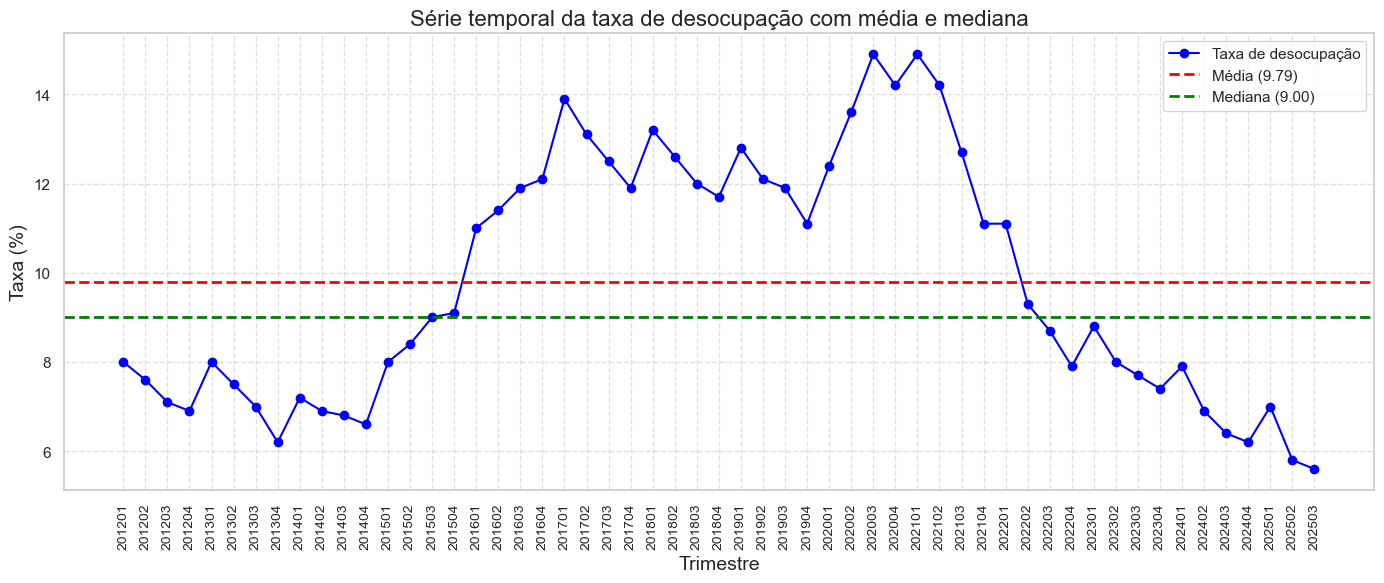

In [36]:
# Filtrar apenas a variável taxa de desocupação
taxa = df_curto[df_curto["Variavel"] == "Taxa de desocupação"]

# Calcular média e mediana
media = taxa["Valor_preenchido"].mean()
mediana = taxa["Valor_preenchido"].median()

# Plotar série temporal
plt.figure(figsize=(14,6))
plt.plot(taxa["TrimestreCodigo"], taxa["Valor_preenchido"], marker="o", color="blue", label="Taxa de desocupação")

# Adicionar linhas tracejadas da média e mediana
plt.axhline(y=media, color="red", linestyle="--", linewidth=2, label=f"Média ({media:.2f})")
plt.axhline(y=mediana, color="green", linestyle="--", linewidth=2, label=f"Mediana ({mediana:.2f})")

# Ajustes visuais
plt.title("Série temporal da taxa de desocupação com média e mediana", fontsize=16)
plt.xlabel("Trimestre", fontsize=14)
plt.ylabel("Taxa (%)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

A incorporação da média e da mediana histórica na série temporal da taxa de desocupação permite identificar de forma clara os períodos em que o desemprego se manteve acima dos níveis típicos da série. Entre 2016 e 2021, observa-se um ciclo de elevadas taxas de desocupação, resultado da combinação de dois choques relevantes: a crise econômica de 2015–2016, que já havia elevado o desemprego estrutural, e a pandemia de COVID-19, que intensificou a deterioração do mercado de trabalho a partir de 2020.

A análise mostra que, durante esse intervalo, a taxa permaneceu consistentemente acima da média e da mediana histórica, evidenciando não apenas a gravidade conjuntural, mas também a persistência do problema. Esse comportamento reforça a leitura de que o período foi marcado por pressões estruturais sobre o mercado de trabalho, com recuperação apenas gradual após o choque pandêmico.

De maneira a reduzir a volatibilidade dos dados trimestrais, irei utilizar a média móvel de 4 trimestres. Essa escolha pelos 4 trimestres se dá pela boa prática de trabalhar com esse tipo de série temporal analisando movimentos anuais e captando apenas as oscilações mais importantes e reduzindo as pontuais (como choques sazonais ou eventos isolados) - a ideia aqui é destacar a tendência geral.
Além disto, a média móvel evidencia períodos de alta e baixa sustentados, permitindo observar ciclos econômicos.

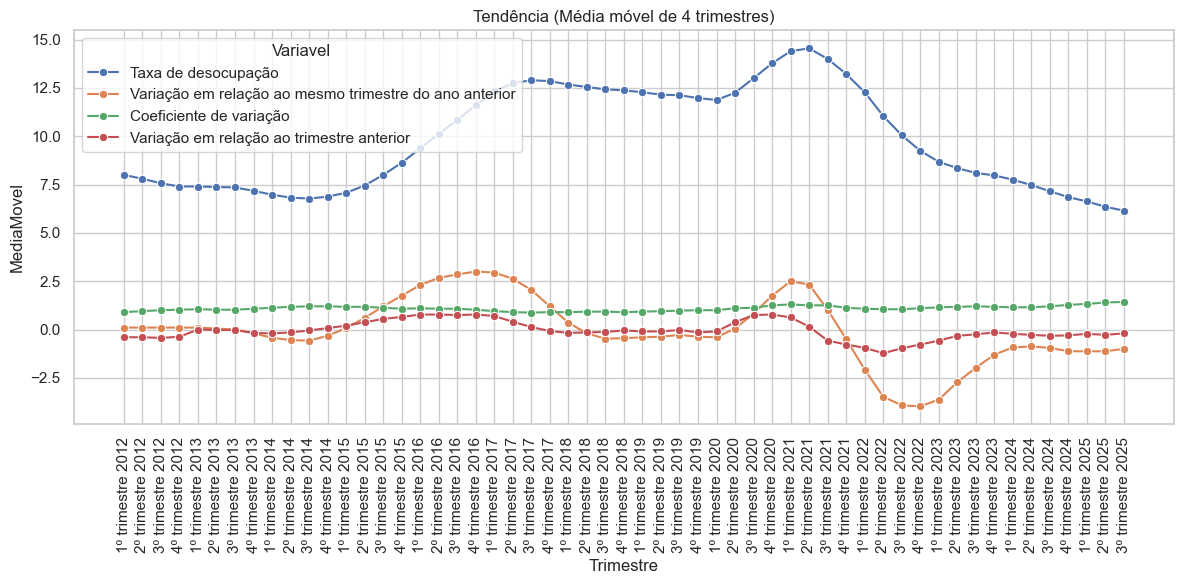

In [37]:
# Média móvel de 4 trimestres
df_curto["MediaMovel"] = df_curto.groupby("Variavel")["Valor_preenchido"].transform(lambda x: x.rolling(4, min_periods=1).mean())

sns.lineplot(data=df_curto, x="Trimestre", y="MediaMovel", hue="Variavel", marker="o")
plt.title("Tendência (Média móvel de 4 trimestres)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

A utilização da média móvel de quatro trimestres na série da taxa de desocupação permite suavizar oscilações de curto prazo e destacar tendências estruturais. Durante a pandemia de COVID-19, esse recurso evidencia não apenas o pico do desemprego, mas também a duração e intensidade do ciclo de deterioração do mercado de trabalho. A suavização elimina parte do ruído estatístico e torna mais clara a persistência do desemprego elevado ao longo de vários trimestres consecutivos.

Além disso, a média móvel revela que, antes do choque pandêmico, o Brasil indicava uma recuperação muito baixa do mercado de trabalho, ainda condicionada pelos efeitos da crise econômica de 2015–2016. Esse movimento sugere que o mercado de trabalho não apenas sofreu um impacto conjuntural da pandemia, mas também carregava fragilidades estruturais herdadas de crises anteriores. Desta forma, o desemprego elevado não foi um evento isolado, mas parte de um ciclo prolongado iniciado em 2015/16 e intensificado em 2020.

Ainda dentro da análise de média móvel, fica claro, ao observar os indicadores de variação da taxa de desocupação, como os anos de 2022 e 2023 foram pontos de inflexão para reverter a tendência de deterioração do mercado de trabalho e se tornaram anos importantes de recuperação do mercado de trabalho.

Por fim, o coeficiente de variação suavizado nos mostra que a previsão estatística das estimativas se manteve estável, praticamente, ao longo de toda a série temporal.

Ainda para evitar os erros de generalização por conta de efeitos sazonais, separei uma breve análise dos indicadores por trimestre. A ideia aqui é identificar padrões recorrentes, que se repetem anualmente, independentemente de crises ou choques externos.

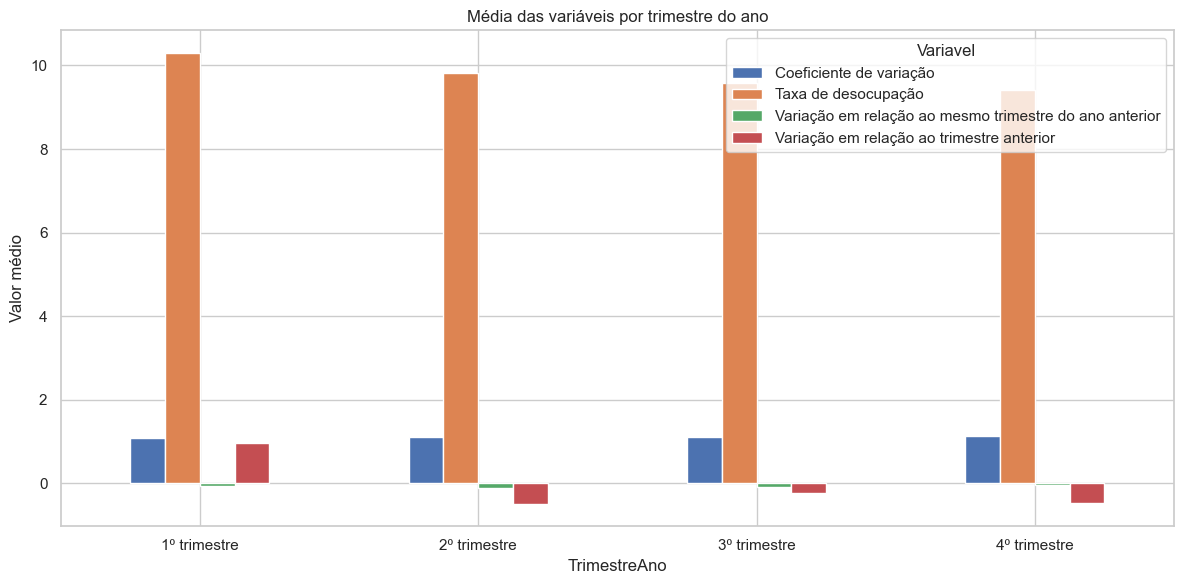

In [38]:
# Extrair trimestre do texto
df_curto["TrimestreAno"] = df_curto["Trimestre"].str.extract(r"(\dº trimestre)")

# Média por trimestre do ano
sazonal = df_curto.groupby(["TrimestreAno","Variavel"])["Valor_preenchido"].mean().unstack()

sazonal.plot(kind="bar")
plt.title("Média das variáveis por trimestre do ano")
plt.ylabel("Valor médio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Analisando a disposição das médias por trimestre, observamos que o mercado de trabalho brasileiro tende a iniciar o ano mais desaquecido e, ao longo do ano, apresenta sinais de melhoras.
Este padrão, inclusive é consistente com a sazonalidade do emprego, uma vez que:
    - No início do ano, há desligamentos pós-festas e férias escolares, além da redução de vagas temporárias criadas no fim do ano anterior.
    - A partir do segundo trimestre, há recontratações e retomada da atividade econômica, o que contribui para a queda gradual da taxa de desocupação.

### Observações econômicas
- **2015–2016**: pico da taxa de desocupação coincide com a recessão econômica brasileira.
- **2020**: impacto da pandemia da COVID-19, aumento abrupto do desemprego.
- **2021–2022**: recuperação parcial do mercado de trabalho.